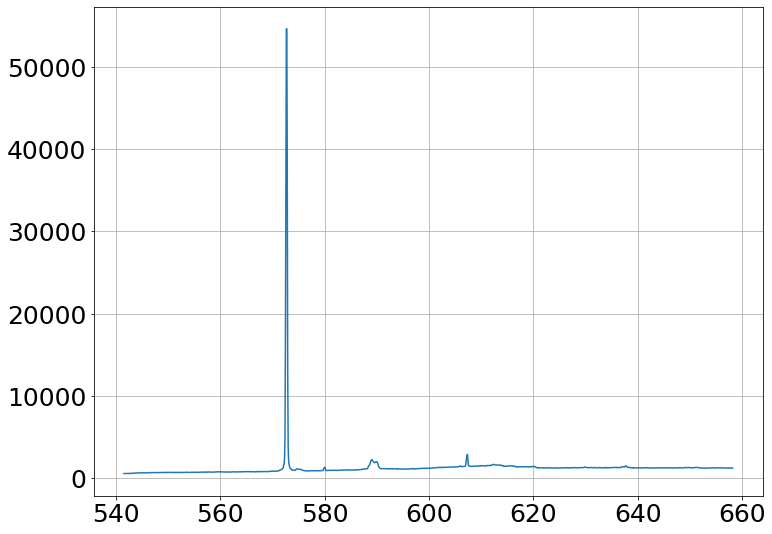

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel
import math

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg


def integrate (wavelength, intensity, minWavelength, maxWavelength):
    sum = 0
    Index = list(range(findarg(wavelength, minWavelength),findarg(wavelength, maxWavelength)))
    for i in Index:
        sum += intensity[i]*(wavelength[i+1]-wavelength[i])
    return sum

filename = '97-m3-6-2'
data = pd.read_csv(filename+'.csv')
regionMin = data['W'][0]
regionMax = data['W'][len(data['W'])-1]
argMin = findarg(data['W'], regionMin)
argMax = findarg(data['W'], regionMax)

plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][argMin:argMax],data['I'][argMin:argMax])
plt.savefig(filename+'_full_PL.png', format= 'png',transparent=True)


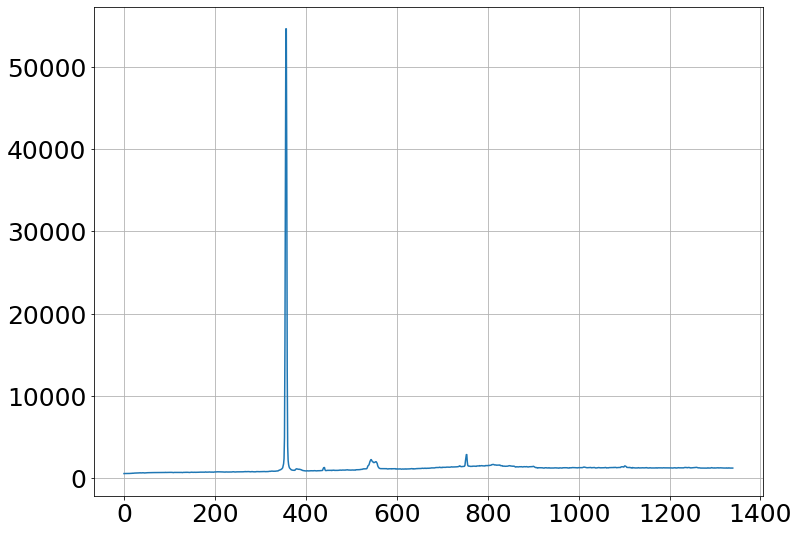

In [52]:
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['I'])

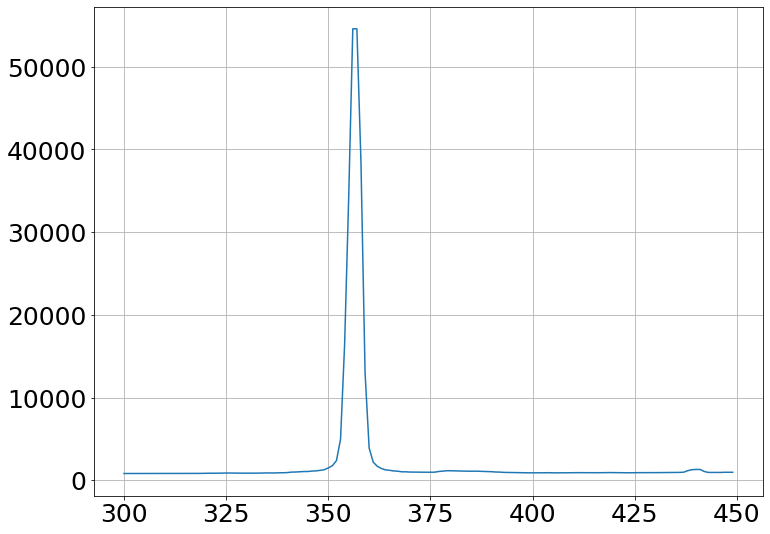

In [53]:
Index = list(range(300,450))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['I'][Index])

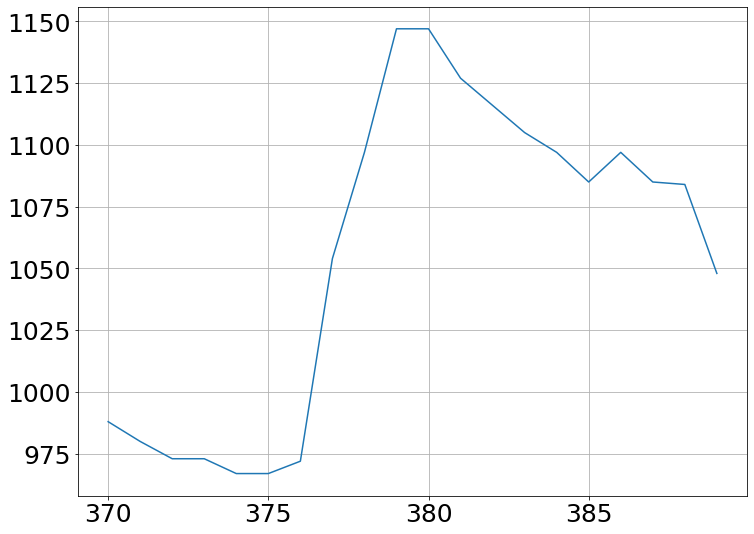

In [54]:
Index = list(range(370,390))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['I'][Index])

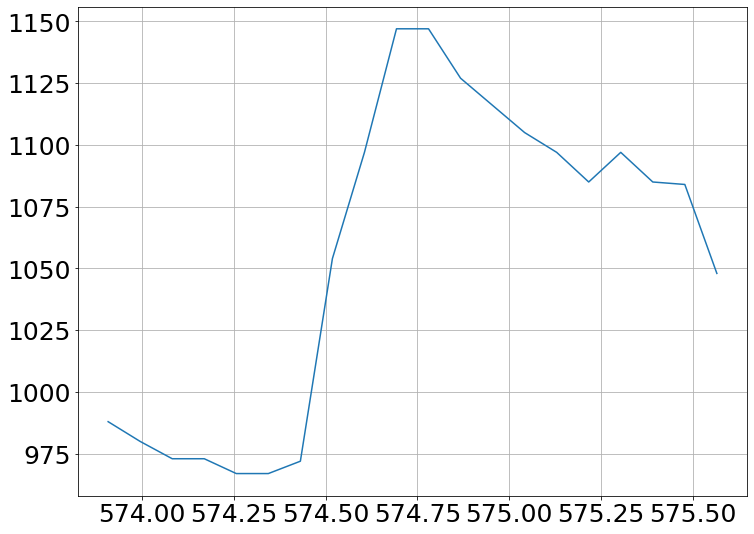

In [55]:
Index = list(range(370,390))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][Index],data['I'][Index])

# R1 

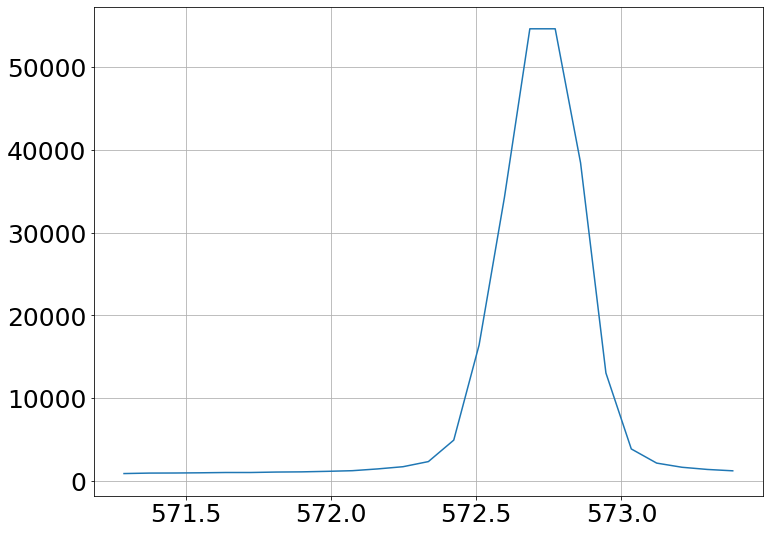

In [56]:
Index = list(range(340,365))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][Index],data['I'][Index])

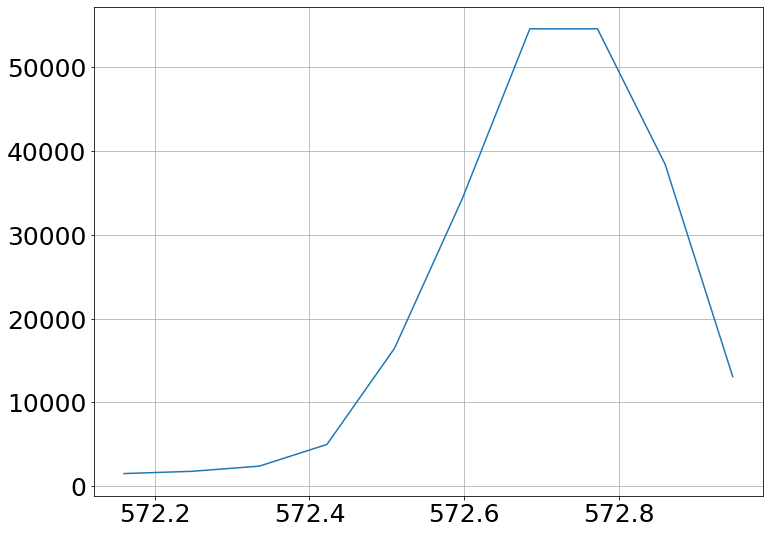

In [57]:
Index = list(range(350,360))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][Index],data['I'][Index])

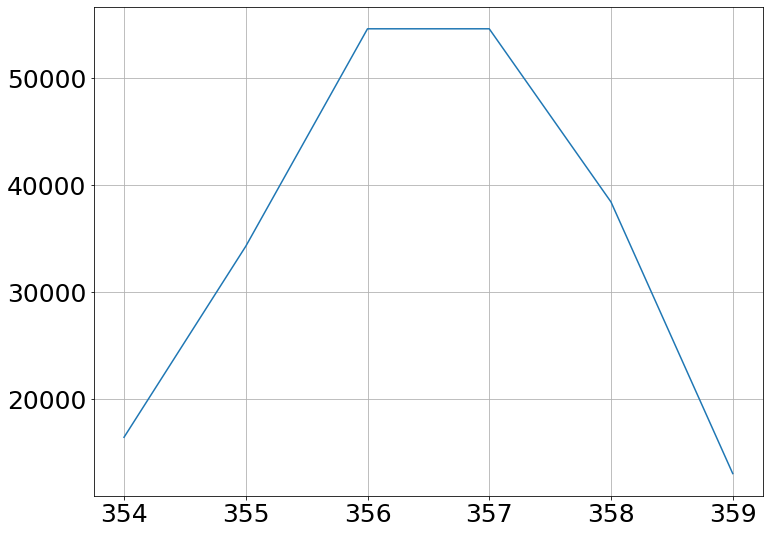

In [58]:
Index = list(range(354,360))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['I'][Index])

# NV0

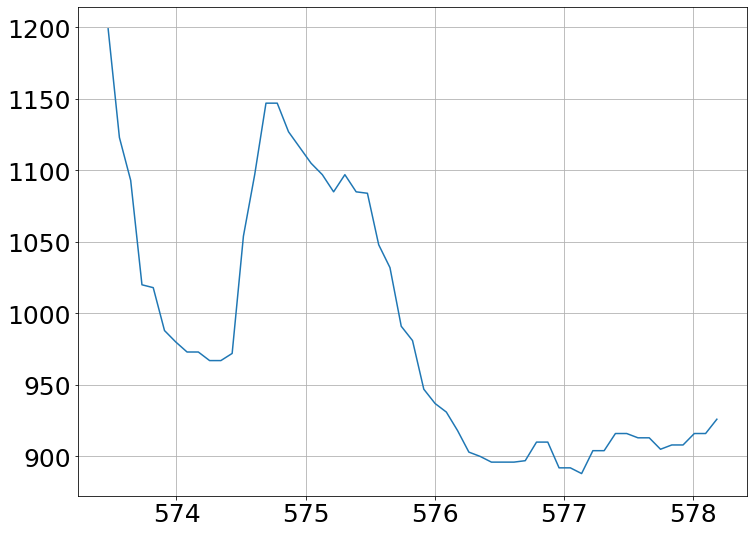

In [59]:
Index = list(range(365,420))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][Index],data['I'][Index])

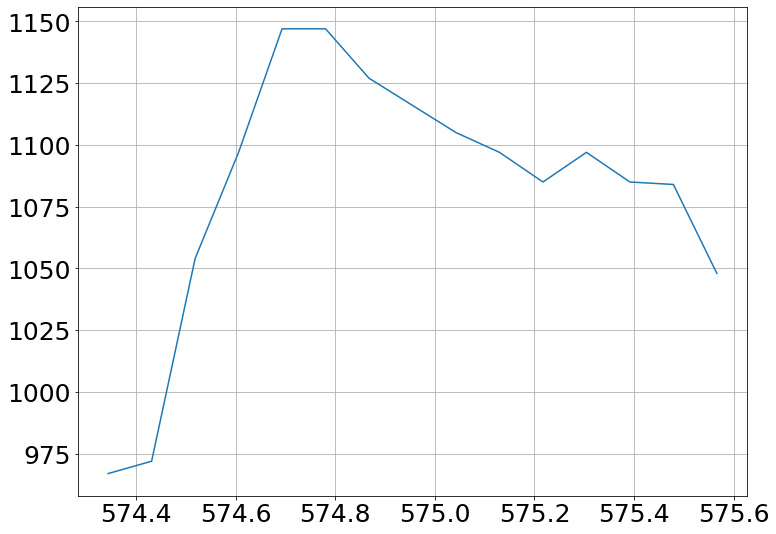

In [60]:
Index = list(range(375,390))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][Index],data['I'][Index])

# Fit NV0

In [61]:
model1 = QuadraticModel(prefix='bkg_') + LorentzianModel(prefix='r1_') + LorentzianModel(prefix='nv0_')
# model1 =  LorentzianModel(prefix='r1_') + LorentzianModel(prefix='nv0_')
model = model1
params = model.make_params()
print('parameter names: {}'.format(model.param_names))

parameter names: ['bkg_a', 'bkg_b', 'bkg_c', 'r1_amplitude', 'r1_center', 'r1_sigma', 'nv0_amplitude', 'nv0_center', 'nv0_sigma']


In [62]:
nv0_peak = data['W'][375+np.argmax(data['I'][375:390])]

params['r1_center'].set(value = 572.7, vary=True)
params['r1_amplitude'].set(value=48000, min=0, vary=True)
params['r1_sigma'].set(value=0.25, vary=True)

params['nv0_center'].set(value = nv0_peak, min = nv0_peak-0.5, max = nv0_peak+0.5, vary=True)
params['nv0_amplitude'].set(value=47123, min = 0, vary=True)
params['nv0_sigma'].set(value=0.3, max = 0.4, vary=True)

params['bkg_a'].set(value = 0, vary= False)
params['bkg_b'].set(value = 0, vary=False)
params['bkg_c'].set(value = 0, vary=True)

params.pretty_print(columns=['value','vary'])

Name              Value     Vary
bkg_a                 0    False
bkg_b                 0    False
bkg_c                 0     True
nv0_amplitude  4.712e+04     True
nv0_center        574.7     True
nv0_fwhm            0.6    False
nv0_height        5e+04    False
nv0_sigma           0.3     True
r1_amplitude    4.8e+04     True
r1_center         572.7     True
r1_fwhm             0.5    False
r1_height      6.112e+04    False
r1_sigma           0.25     True


[[Model]]
    ((Model(parabolic, prefix='bkg_') + Model(lorentzian, prefix='r1_')) + Model(lorentzian, prefix='nv0_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16000
    # data points      = 41
    # variables        = 7
    chi-square         = 43.2967716
    reduced chi-square = 1.27343446
    Akaike info crit   = 16.2347463
    Bayesian info crit = 28.2297507
    R-squared          = 0.99999971
##  Warning: uncertainties could not be estimated:
    nv0_sigma:      at boundary
[[Variables]]
    bkg_a:          0 (fixed)
    bkg_b:          0 (fixed)
    bkg_c:          901.580380 (init = 0)
    r1_amplitude:   167537.416 (init = 48000)
    r1_center:      572.860423 (init = 572.7)
    r1_sigma:       0.00169100 (init = 0.25)
    nv0_amplitude:  300.957712 (init = 47123)
    nv0_center:     575.021508 (init = 574.6931)
    nv0_sigma:      0.40000000 (init = 0.3)
    r1_fwhm:        0.00338199 == '2.0000000*r1_sigma'
    r1_height:      31536938.8 ==

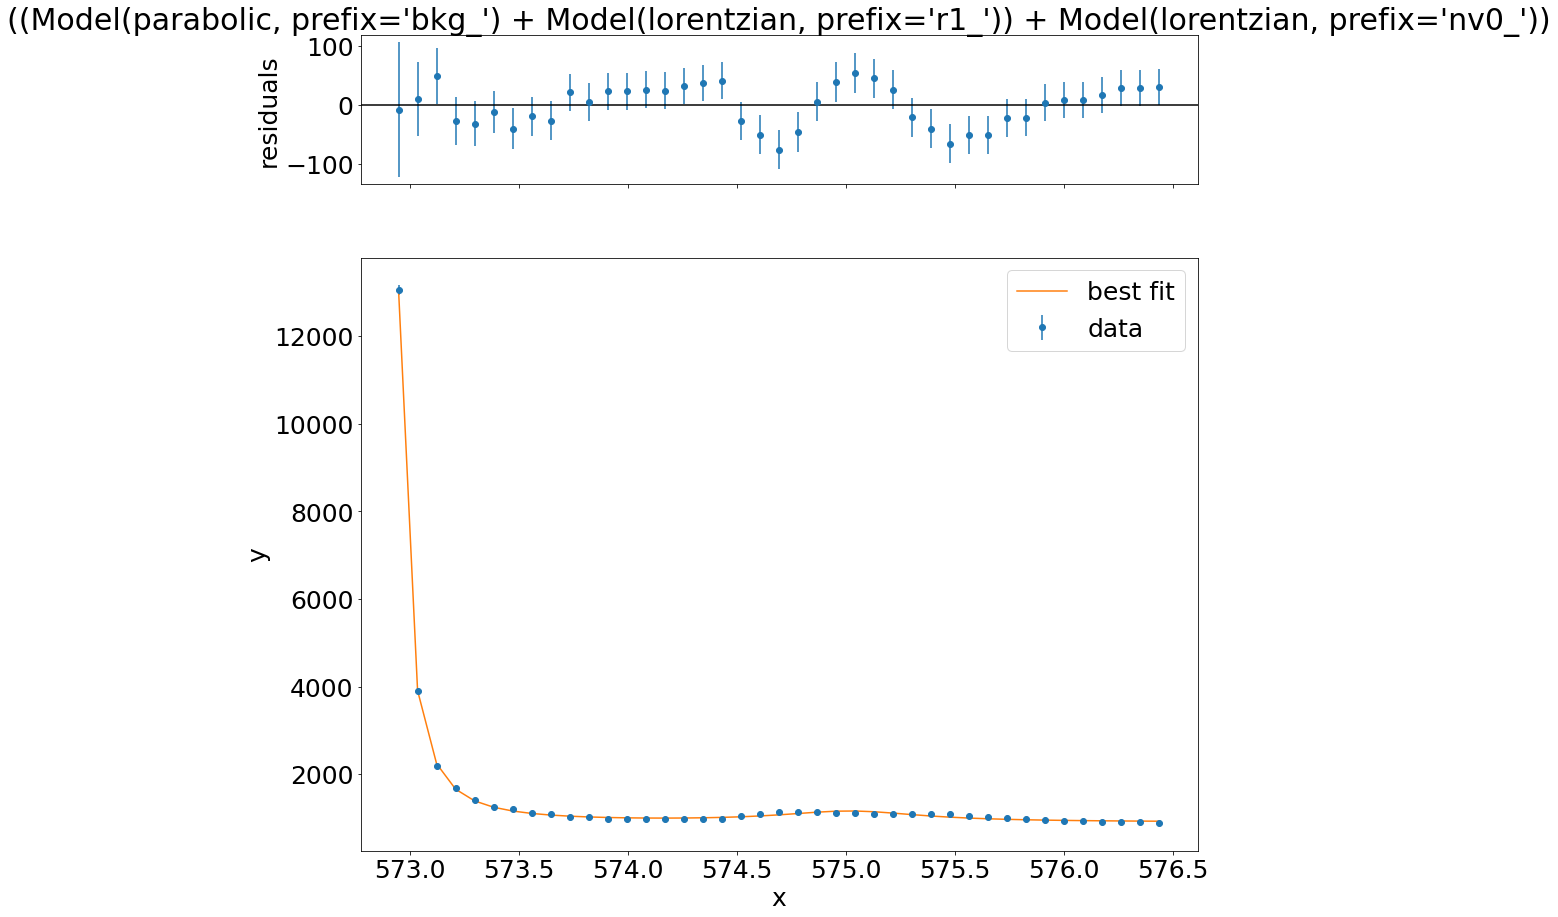

In [63]:
# for EL2-97
Index = list(range(359,400))

# for EL2-98
# Index = list(range(358,400))

weightList = 1/np.sqrt(data['I'][Index])
# weightList[356]=0
# weightList[357]=0

result = model.fit(data['I'][Index], params, x=data['W'][Index], weights=weightList)
print(result.fit_report(show_correl=False))
myfig=plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 25})
result.plot(fig=myfig)
plt.savefig(filename+'_nv0_report.png', format= 'png',transparent=True)

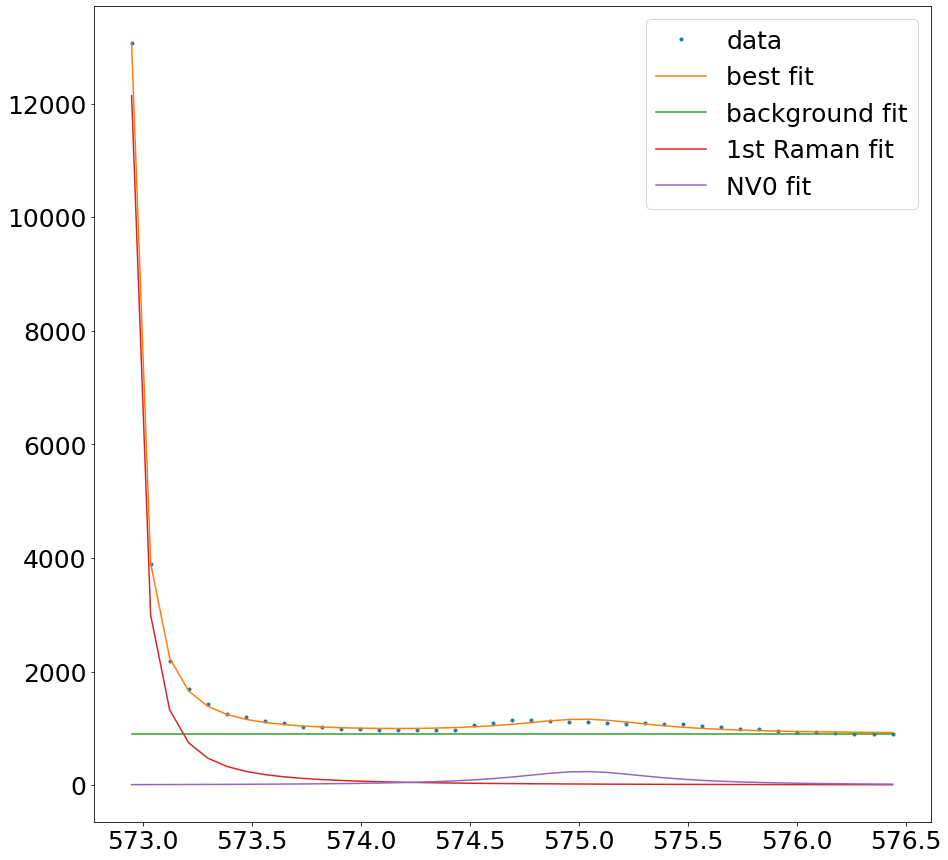

In [64]:
comps = result.eval_components(x=data['W'][Index])

myfig=plt.figure(figsize=(15,15))
plt.plot(data['W'][Index], data['I'][Index], 'o', markersize=3, label='data')
plt.plot(data['W'][Index], result.best_fit, label='best fit')
plt.plot(data['W'][Index], comps['bkg_'], label='background fit')
plt.plot(data['W'][Index], comps['r1_'], label='1st Raman fit')
plt.plot(data['W'][Index], comps['nv0_'], label='NV0 fit')
plt.legend()
plt.savefig(filename+'_nv0_fit.png', format= 'png',transparent=True)

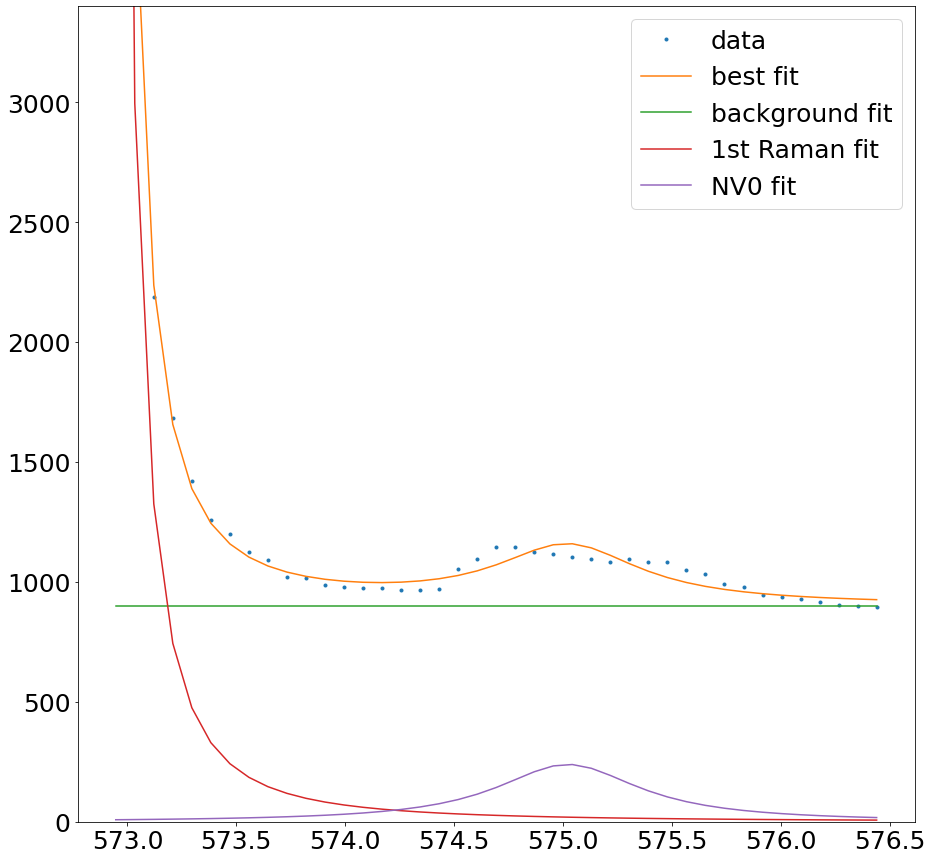

In [65]:
comps = result.eval_components(x=data['W'][Index])

myfig=plt.figure(figsize=(15,15))
plt.plot(data['W'][Index], data['I'][Index], 'o', markersize=3, label='data')
plt.plot(data['W'][Index], result.best_fit, label='best fit')
plt.plot(data['W'][Index], comps['bkg_'], label='background fit')
plt.plot(data['W'][Index], comps['r1_'], label='1st Raman fit')
plt.plot(data['W'][Index], comps['nv0_'], label='NV0 fit')
plt.ylim(0,3400)
plt.legend()
plt.savefig(filename+'_nv0_fit_detail.png', format= 'png',transparent=True)

In [66]:
nv0Center = result.params['nv0_center']
nv0HWHM = result.params['nv0_sigma']
nv0 = integrate(data['W'],comps['nv0_'],nv0Center - nv0HWHM*2, nv0Center + nv0HWHM*2)

# NV-

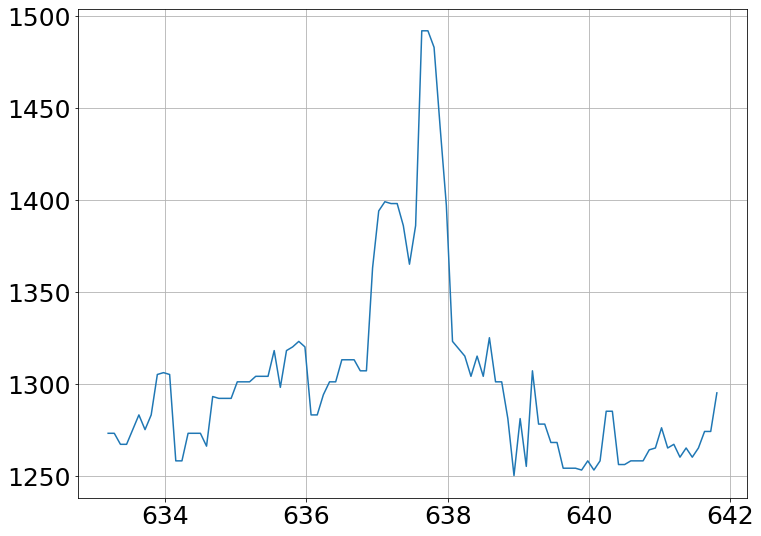

In [67]:
Index = list(range(1050,1150))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][Index],data['I'][Index])

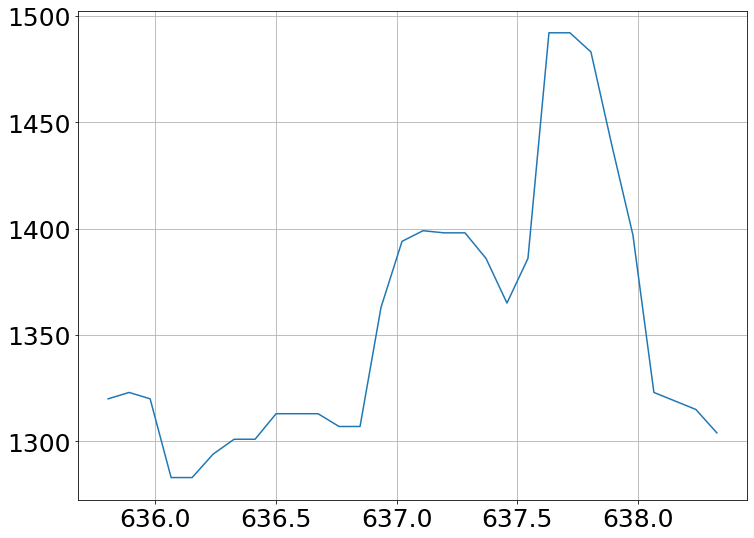

In [68]:
Index = list(range(1080,1110))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][Index],data['I'][Index])

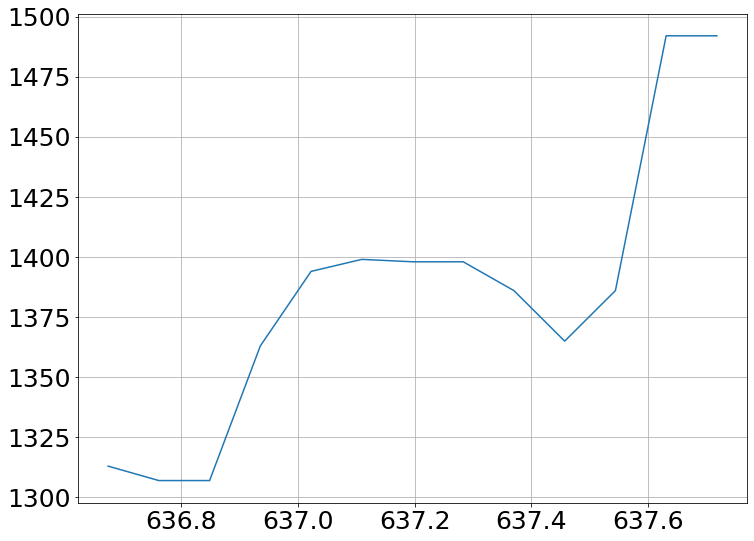

In [69]:
Index = list(range(1090,1103))
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data['W'][Index],data['I'][Index])

# Fit NV-

In [70]:
model2 = QuadraticModel(prefix='bkg_') + LorentzianModel(prefix='nvm_')
model = model2
params = model.make_params()
print('parameter names: {}'.format(model.param_names))

parameter names: ['bkg_a', 'bkg_b', 'bkg_c', 'nvm_amplitude', 'nvm_center', 'nvm_sigma']


In [71]:
nvm_peak = data['W'][1080+np.argmax(data['I'][1080:1110])]

params['nvm_center'].set(value=nvm_peak, min = nvm_peak-0.5, max = nvm_peak + 0.5, vary=True)
params['nvm_amplitude'].set(value=10000, min = 0, vary=True)
params['nvm_sigma'].set(value=0.5, max = 1, vary=True)

params['bkg_a'].set(value = 0, vary=True)
params['bkg_b'].set(value = 0, vary=True)
params['bkg_c'].set(value = 0, vary=True)


[[Model]]
    (Model(parabolic, prefix='bkg_') + Model(lorentzian, prefix='nvm_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 78
    # data points      = 200
    # variables        = 6
    chi-square         = 56.8050740
    reduced chi-square = 0.29280966
    Akaike info crit   = -239.738343
    Bayesian info crit = -219.948439
    R-squared          = 0.99983378
[[Variables]]
    bkg_a:          0.26188139 +/- 0.07708145 (29.43%) (init = 0)
    bkg_b:         -336.441860 +/- 98.2839094 (29.21%) (init = 0)
    bkg_c:          109317.684 +/- 31327.1670 (28.66%) (init = 0)
    nvm_amplitude:  302.645273 +/- 22.8929103 (7.56%) (init = 10000)
    nvm_center:     637.619136 +/- 0.02643123 (0.00%) (init = 637.6315)
    nvm_sigma:      0.52462396 +/- 0.04604358 (8.78%) (init = 0.5)
    nvm_fwhm:       1.04924793 +/- 0.09208716 (8.78%) == '2.0000000*nvm_sigma'
    nvm_height:     183.626737 +/- 9.45462478 (5.15%) == '0.3183099*nvm_amplitude/max(1e-15, nvm_sig

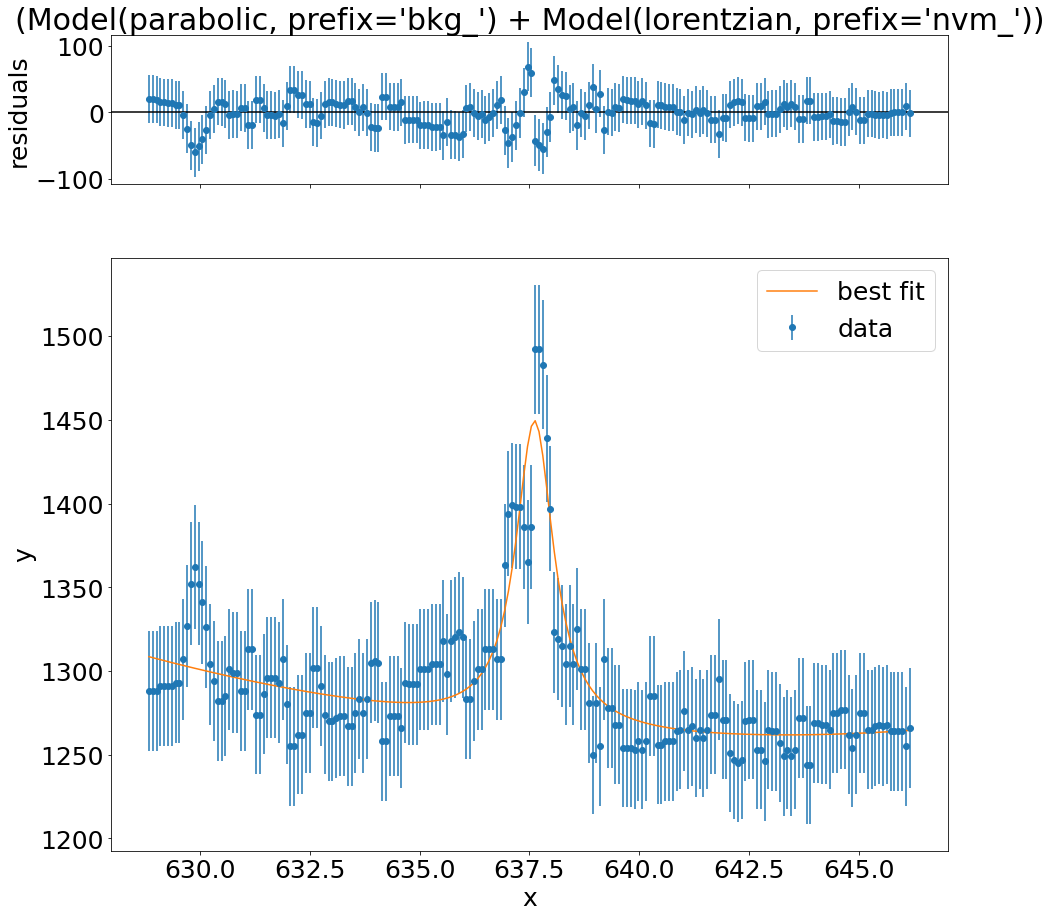

In [72]:
Index = list(range(1000,1200))

weightList = 1/np.sqrt(data['I'][Index])

result = model.fit(data['I'][Index], params, x=data['W'][Index], weights=weightList)
print(result.fit_report(show_correl=False))
myfig=plt.figure(figsize=(15,15))
result.plot(fig=myfig)
plt.savefig(filename+'_nvm_report.png', format= 'png',transparent=True)

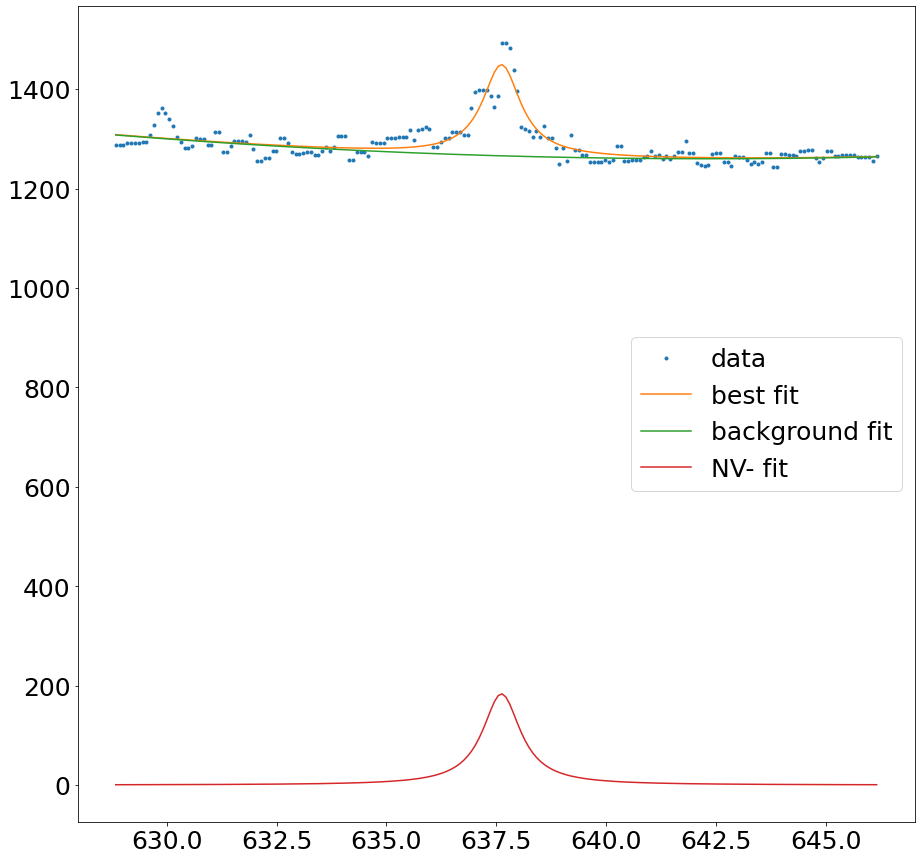

In [73]:
comps = result.eval_components(x=data['W'][Index])

myfig=plt.figure(figsize=(15,15))
plt.plot(data['W'][Index], data['I'][Index], 'o', markersize=3, label='data')
plt.plot(data['W'][Index], result.best_fit, label='best fit')
plt.plot(data['W'][Index], comps['bkg_'], label='background fit')
plt.plot(data['W'][Index], comps['nvm_'], label='NV- fit')
plt.legend()
plt.savefig(filename+'_nvm_fit.png', format= 'png',transparent=True)

In [74]:
nvmCenter = result.params['nvm_center']
nvmHWHM = result.params['nvm_sigma']
nvm = integrate(data['W'],comps['nvm_'],nvmCenter - nvmHWHM*2, nvmCenter + nvmHWHM*2)

In [75]:
ratio = nvm/(nvm+nv0)
ratio

0.5025376715028705